No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Failed to read file HWA_data\Measurement_pos4_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos4_aoa0.txt'
Failed to read file HWA_data\Measurement_pos8_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos8_aoa0.txt'
Failed to read file HWA_data\Measurement_pos12_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos12_aoa0.txt'
Failed to read file HWA_data\Measurement_pos16_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos16_aoa0.txt'
Failed to read file HWA_data\Measurement_pos20_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos20_aoa0.txt'
Failed to read file HWA_data\Measurement_pos24_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos24_aoa0.txt'
Failed to read file HWA_data\Measurement_pos28_aoa0.txt: [Errno 2] No such file or directory: 'HWA_data\\Measurement_pos28_aoa0.txt'
Failed to read file HWA_data\Measurement_pos32_aoa0.txt: [Errno 2] No suc

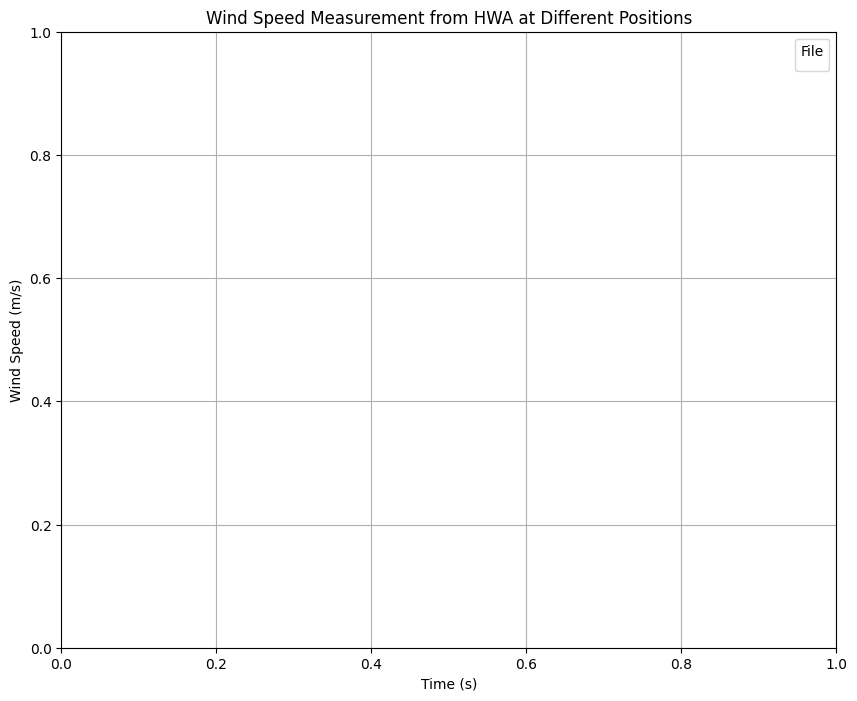

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing the data
folder_path = 'HWA_data'

# Generate file paths for measurements at different positions
files = [os.path.join(folder_path, f'Measurement_pos{i}_aoa0.txt') for i in range(4, 41, 4)]

# Assuming a calibration factor for converting voltage to wind speed (e.g., m/s per volt)
voltage_to_m_per_s = 2.5  # Example conversion factor

plt.figure(figsize=(10, 8))

# Loop through each file and plot the data
for file_path in files:
    try:
        # Load the data from the text file
        data = pd.read_csv(file_path, sep="\t", skiprows=lambda x: x in range(23) or x==1, usecols=[0, 1])
        
        # Convert voltage readings to speed using the calibration factor
        data['Speed (m/s)'] = data['Voltage'] * voltage_to_m_per_s
        
        # Plot the data
        plt.plot(data['X_Value'], data['Speed (m/s)'], label=f'{os.path.basename(file_path)}')
    except Exception as e:
        print(f"Failed to read file {file_path}: {e}")

plt.title('Wind Speed Measurement from HWA at Different Positions')
plt.xlabel('Time (s)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title="File")
plt.grid(True)
plt.show()